# Importing Libraries for Data Manipulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the trianing dataset

In [2]:
train = pd.read_csv('titanic/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Checking for any null values in the dataset**

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
len(train)

891

**Removing useless columns**

Cabin, Ticket and Name

**Removing "Cabin, Ticket" columns**

In [6]:
train = train.drop(['Cabin', 'Ticket', 'Name'], axis=1)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


**Dealing with missing data of "Age" column**

In [8]:
np.mean(train['Age'])

29.69911764705882

In [9]:
np.median(train['Age'])

nan

We are going with the mean age

In [10]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [11]:
train.iloc[:, 5:8] = imputer.fit_transform(train.iloc[:, 5:8])

In [12]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1.0,0.0,7.2500,S
1,2,1,1,female,38.0,1.0,0.0,71.2833,C
2,3,1,3,female,26.0,0.0,0.0,7.9250,S
3,4,1,1,female,35.0,1.0,0.0,53.1000,S
4,5,0,3,male,35.0,0.0,0.0,8.0500,S


In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

**Categorizing Peopele on in "Child", "Male" and "Female"**

In [14]:
def person_map(df):
    person = []
    for i in range(len(df)):
        if df.iloc[i]['Age'] < 18:
            person.append('Child')
        else:
            person.append(df.iloc[i]['Sex'])
    return person

In [15]:
train['Person'] = person_map(train)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person
0,1,0,3,male,22.0,1.0,0.0,7.2500,S,male
1,2,1,1,female,38.0,1.0,0.0,71.2833,C,female
2,3,1,3,female,26.0,0.0,0.0,7.9250,S,female
3,4,1,1,female,35.0,1.0,0.0,53.1000,S,female
4,5,0,3,male,35.0,0.0,0.0,8.0500,S,male


In [17]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Person           0
dtype: int64

In [18]:
pd.unique(train['Person'])

array(['male', 'female', 'Child'], dtype=object)

**Plots showing a Person and categorized as survived or not survived**

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='Person', ylabel='count'>

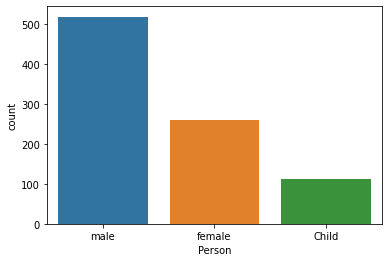

In [20]:
sns.countplot(data=train, x='Person')

<AxesSubplot:xlabel='Person', ylabel='count'>

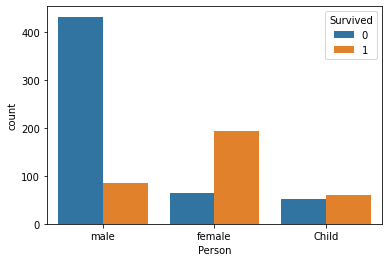

In [21]:
sns.countplot(data=train, x='Person', hue='Survived')

**Plot showing people in different Classes of the ship and survived or not based on which ship class they were**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

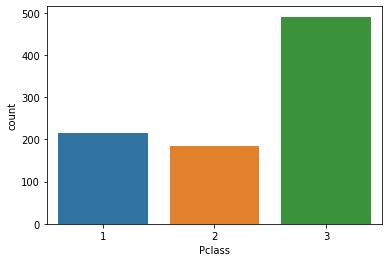

In [22]:
sns.countplot(data=train, x='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

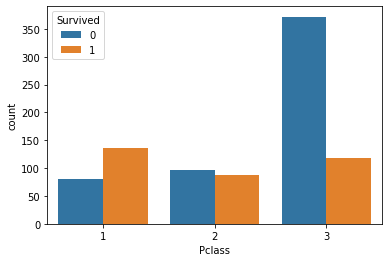

In [23]:
sns.countplot(data=train, x='Pclass', hue='Survived')

**Finding out if a person was alone or with someone and what relation did they had, whether their having a family had any impact on their survival or not**

In [24]:
def with_person(df):
    with_someone = []
    for i in range(len(df)):
        if df.iloc[i]['SibSp'] + df.iloc[i]['Parch'] > 0:
            with_someone.append('with someone')
        else:
            with_someone.append('alone')
    return with_someone

In [25]:
train['with_someone'] = with_person(train)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,with_someone
0,1,0,3,male,22.0,1.0,0.0,7.2500,S,male,with someone
1,2,1,1,female,38.0,1.0,0.0,71.2833,C,female,with someone
2,3,1,3,female,26.0,0.0,0.0,7.9250,S,female,alone
3,4,1,1,female,35.0,1.0,0.0,53.1000,S,female,with someone
4,5,0,3,male,35.0,0.0,0.0,8.0500,S,male,alone


In [27]:
train.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Embarked          2
Person            0
with_someone      0
dtype: int64

In [28]:
pd.unique(train['with_someone'])

array(['with someone', 'alone'], dtype=object)

<AxesSubplot:xlabel='with_someone', ylabel='count'>

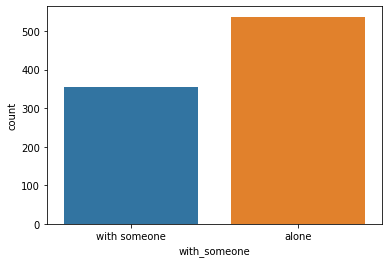

In [29]:
sns.countplot(data=train, x='with_someone')

<AxesSubplot:xlabel='with_someone', ylabel='count'>

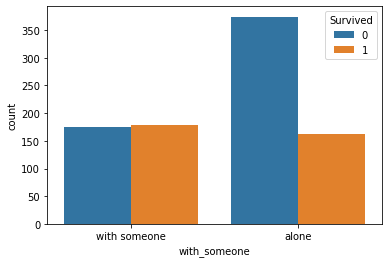

In [30]:
sns.countplot(data=train, x='with_someone', hue='Survived')

<AxesSubplot:xlabel='with_someone', ylabel='count'>

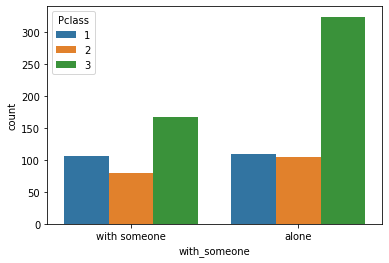

In [31]:
sns.countplot(data=train, x='with_someone', hue='Pclass')

**Checking the Embarked column and dealing with its null values and then encoding the String values**

<AxesSubplot:xlabel='Embarked', ylabel='count'>

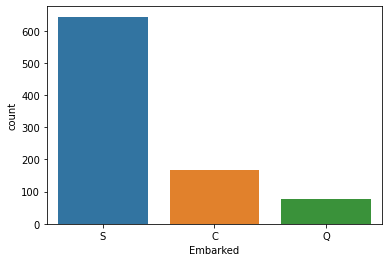

In [32]:
sns.countplot(data=train, x='Embarked')

In [33]:
train['Embarked'] = train['Embarked'].replace(np.nan, 'S')

In [34]:
train['Embarked'] = train['Embarked'].map({'S': 0, 'C':1, 'Q': 2})

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,with_someone
0,1,0,3,male,22.0,1.0,0.0,7.2500,0,male,with someone
1,2,1,1,female,38.0,1.0,0.0,71.2833,1,female,with someone
2,3,1,3,female,26.0,0.0,0.0,7.9250,0,female,alone
3,4,1,1,female,35.0,1.0,0.0,53.1000,0,female,with someone
4,5,0,3,male,35.0,0.0,0.0,8.0500,0,male,alone


In [36]:
train.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Embarked          0
Person            0
with_someone      0
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

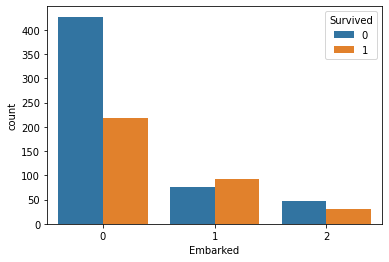

In [37]:
sns.countplot(data=train, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

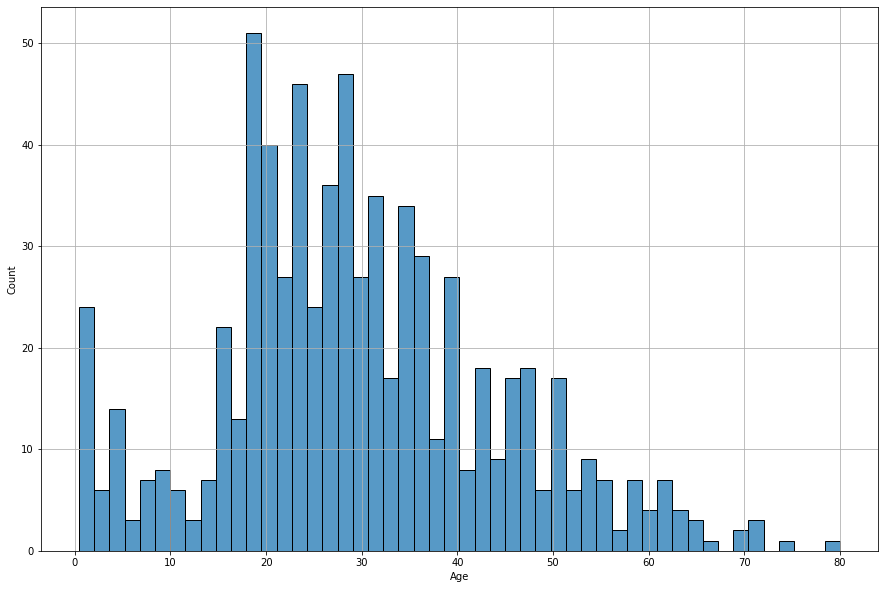

In [38]:
plt.figure(figsize=(15,10))
plt.grid()
sns.histplot(data=train, x='Age', bins=50)

<AxesSubplot:xlabel='Age', ylabel='Count'>

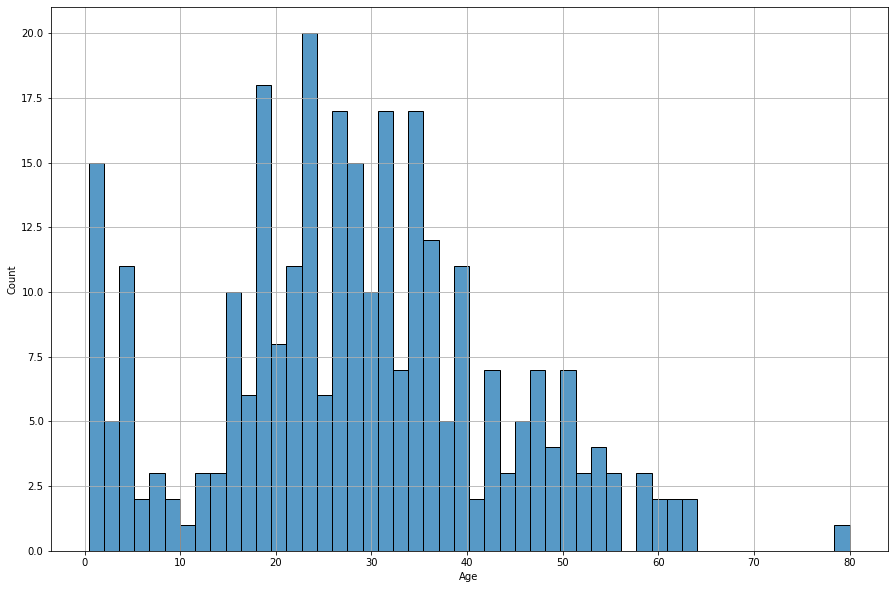

In [39]:
plt.figure(figsize=(15,10))
plt.grid()
sns.histplot(data=train, x=train.loc[train['Survived']==1, 'Age'], bins=50)

<AxesSubplot:xlabel='Age', ylabel='Count'>

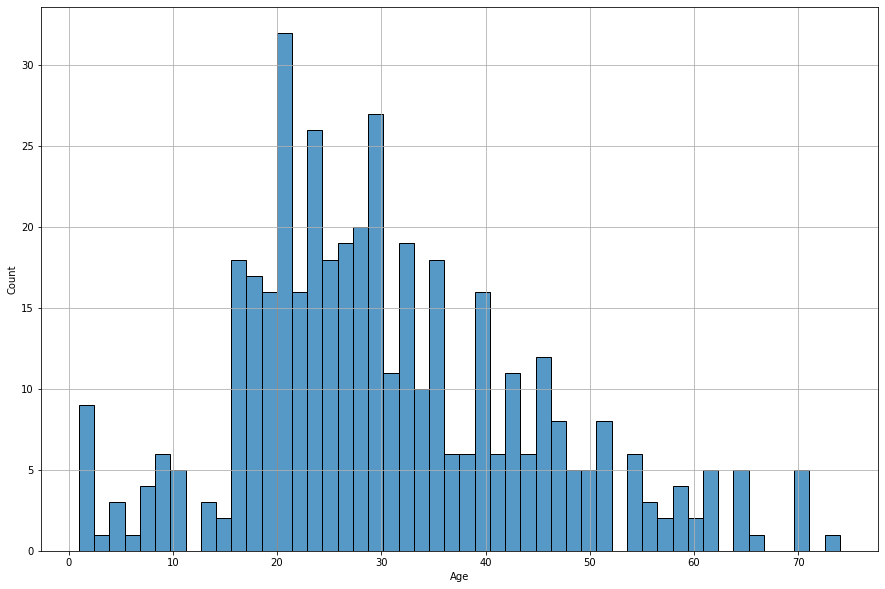

In [40]:
plt.figure(figsize=(15,10))
plt.grid()
sns.histplot(data=train, x=train.loc[train['Survived']==0, 'Age'], bins=50)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,with_someone
0,1,0,3,male,22.0,1.0,0.0,7.2500,0,male,with someone
1,2,1,1,female,38.0,1.0,0.0,71.2833,1,female,with someone
2,3,1,3,female,26.0,0.0,0.0,7.9250,0,female,alone
3,4,1,1,female,35.0,1.0,0.0,53.1000,0,female,with someone
4,5,0,3,male,35.0,0.0,0.0,8.0500,0,male,alone


**Encoding relevant columns**

In [42]:
train['Person'] = train['Person'].map({'Child':0, 'female':1, 'male':2})
train['with_someone'] = train['with_someone'].map({'with someone': 0, 'alone':1})

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person,with_someone
0,1,0,3,male,22.0,1.0,0.0,7.2500,0,2,0
1,2,1,1,female,38.0,1.0,0.0,71.2833,1,1,0
2,3,1,3,female,26.0,0.0,0.0,7.9250,0,1,1
3,4,1,1,female,35.0,1.0,0.0,53.1000,0,1,0
4,5,0,3,male,35.0,0.0,0.0,8.0500,0,2,1


In [44]:
train.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Embarked          0
Person            0
with_someone      0
dtype: int64

**Spliting the data in features and target values**

In [45]:
x = train[['Pclass', 'Embarked', 'Person', 'with_someone']]
y = train['Survived']

# Creating our Machine Learning models

**Logistic Regression model**

Used this model because Logistic Regression is used in case of binary outcomes

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [47]:
log_reg.fit(x, y)

LogisticRegression()

In [48]:
y_test = log_reg.predict(x)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y, y_test))

0.77665544332211


In [50]:
confusion_matrix(y, y_test)

array([[457,  92],
       [107, 235]])

In [51]:
correct = 0
wrong = 0

for i in range(len(y)):
    if y[i] == y_test[i]:
        correct += 1
    else:
        wrong += 1
        
print(f"Correct: {correct}, Wrong: {wrong}")

Correct: 692, Wrong: 199


**Decision Tree Classifier**

In [52]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()

In [53]:
dec_tree.fit(x, y)
y_test = dec_tree.predict(x)

print(accuracy_score(y, y_test))
print(confusion_matrix(y, y_test))

correct = 0
wrong = 0

for i in range(len(y)):
    if y[i] == y_test[i]:
        correct += 1
    else:
        wrong += 1
        
print(f"Correct: {correct}, Wrong: {wrong}")

0.8249158249158249
[[527  22]
 [134 208]]
Correct: 735, Wrong: 156


**Random Forest Classifier**

This classifier will create 'n_estimators' decision trees and find the best tree for the data

In [54]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20, random_state=0)

In [55]:
random_forest.fit(x, y)

RandomForestClassifier(n_estimators=20, random_state=0)

In [56]:
y_test = random_forest.predict(x)

print(accuracy_score(y, y_test))
print(confusion_matrix(y, y_test))

correct = 0
wrong = 0

for i in range(len(y)):
    if y[i] == y_test[i]:
        correct += 1
    else:
        wrong += 1
        
print(f"Correct: {correct}, Wrong: {wrong}")

0.8249158249158249
[[525  24]
 [132 210]]
Correct: 735, Wrong: 156


**Support Vector Classifier**

It gives us the best hyperplane that divides or categorizes the data

In [57]:
from sklearn.svm import SVC

svc = SVC()

In [58]:
svc.fit(x, y)

SVC()

In [59]:
y_test = svc.predict(x)

print(accuracy_score(y, y_test))
print(confusion_matrix(y, y_test))

correct = 0
wrong = 0

for i in range(len(y)):
    if y[i] == y_test[i]:
        correct += 1
    else:
        wrong += 1
        
print(f"Correct: {correct}, Wrong: {wrong}")

0.8181818181818182
[[514  35]
 [127 215]]
Correct: 729, Wrong: 162


# Predicting the test dataset based on the best above model

**The best model is RandomForestClassifier**

Making all the changes like:
1. Dealing with null values
2. Categorizing people in "Child, Male and Female" and "Alone or with_someone"
3. Encoding the data
4. Extracting the features
5. Making predictions using RandomForestClassifier

In [60]:
test = pd.read_csv('titanic/test.csv')

In [61]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [63]:
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [64]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [65]:
test.iloc[:, 4:-1] = imputer.fit_transform(test.iloc[:, 4:-1])

In [66]:
test['with_someone'] = with_person(test)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,with_someone
0,892,3,"Kelly, Mr. James",male,34.5,0.0,0.0,7.8292,Q,alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,7.0000,S,with someone
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,9.6875,Q,alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0.0,0.0,8.6625,S,alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,12.2875,S,with someone


In [67]:
test['Person'] = person_map(test)

In [68]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,with_someone,Person
0,892,3,"Kelly, Mr. James",male,34.5,0.0,0.0,7.8292,Q,alone,male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,7.0000,S,with someone,female
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,9.6875,Q,alone,male
3,895,3,"Wirz, Mr. Albert",male,27.0,0.0,0.0,8.6625,S,alone,male
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,12.2875,S,with someone,female


In [69]:
test['Embarked'] = test['Embarked'].map({'S': 0, 'C':1, 'Q': 2})
test['Person'] = test['Person'].map({'Child':0, 'female':1, 'male':2})
test['with_someone'] = test['with_someone'].map({'with someone': 0, 'alone':1})

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,with_someone,Person
0,892,3,"Kelly, Mr. James",male,34.5,0.0,0.0,7.8292,2,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,9.6875,2,1,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0.0,0.0,8.6625,0,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,12.2875,0,0,1


In [70]:
x_test = test[['Pclass', 'Embarked', 'Person', 'with_someone']]

In [71]:
predict = random_forest.predict(x_test)

In [72]:
predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Making a csv file 

**Making file for submission of the predictions**

In [73]:
df = pd.read_csv('titanic/gender_submission.csv')

In [74]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [75]:
pas_id = df['PassengerId']

In [76]:
submission = pd.DataFrame(columns = ['PassengerId','Survived'])
submission['PassengerId'] = pas_id
submission['Survived'] = predict

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [77]:
submission.to_csv("titanic/submission.csv",header=True,index=False)